# PanCancer scRNA analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc


In [2]:
# load data
data_dir = "~/data/PanCanSC"

In [3]:
# read scRNA data from HOME dir
adata = sc.read_h5ad("/home/data/PanCanSC/CRC_Liver_Merged/Merged_CRCLiver_TNK_binary.h5ad")

/home/wad18/anaconda3/lib/python3.10/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [10]:
type(adata.obs)

pandas.core.frame.DataFrame

In [4]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,seq_folder,nUMI,nGene,log10GenesPerUMI,mitoRatio,cells,samples,...,N,M,Relapse_state..Yes.0.,FPS_time,OS_state..Yes.0.,OS_time,TNM,Library,RNA_snn_res.0.6,cancertype
SGKUL_CRC16_MUX8563_AAACCTGTCTCGATGA-1,CRC16,1782.0,932,CRC16,3259.0,1531.0,0.906604,0.000000,CRC16_MUX8563_AAACCTGTCTCGATGA-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAACGGGCAAGTTAAG-1,CRC16,2036.0,978,CRC16,3771.0,1686.0,0.902250,0.000000,CRC16_MUX8563_AAACGGGCAAGTTAAG-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAAGATGCAGACAGGT-1,CRC16,1302.0,808,CRC16,2459.0,1383.0,0.926289,0.000000,CRC16_MUX8563_AAAGATGCAGACAGGT-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAAGATGCATGCCTAA-1,CRC16,1767.0,918,CRC16,3136.0,1562.0,0.913426,0.000000,CRC16_MUX8563_AAAGATGCATGCCTAA-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAAGCAAAGAGCCCAA-1,CRC16,1758.0,995,CRC16,3227.0,1656.0,0.917425,0.000000,CRC16_MUX8563_AAAGCAAAGAGCCCAA-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25P_TTGTAGGCACGCGAAA,25P,1332.0,702,NA,NaN,NaN,0.856482,1.948474,NA,NA,...,NA,NA,NA,NA,NA,NA,T4N1M0,X3_v2,8,Liver
25P_TTGTAGGCATCCTTGC,25P,1600.0,800,NA,NaN,NaN,0.859104,1.278669,NA,NA,...,NA,NA,NA,NA,NA,NA,T4N1M0,X3_v2,6,Liver
25P_TTTACTGGTAGGAGTC,25P,636.0,351,NA,NaN,NaN,0.874291,2.740434,NA,NA,...,NA,NA,NA,NA,NA,NA,T4N1M0,X3_v2,20,Liver
25P_TTTATGCGTTGGTAAA,25P,6191.0,2596,NA,NaN,NaN,0.829354,3.292374,NA,NA,...,NA,NA,NA,NA,NA,NA,T4N1M0,X3_v2,9,Liver


In [5]:
print(adata.raw.X.shape) # prints out the total nuber of variables
# print(adata.obs.columns)
# print(adata.var_names) # variable = gene names, 2000 genes w highest variations, used to do clusterings, etc

(895742, 8760)


In [6]:
# can only use pandas with adata.obs/var. index is cell
adata.obs.head(10) 
# nFeature_RNA = # of genes
# nCount_RNA = number of molecules, normalization, used for clustering
# nUMI = unique micro identity, 
# nGene = 
# log10 = genes per umi, if v small(out of 1 as 100), the contribution is from more set of genes
# threshold purpose filter some cells w relative lt ok # of umi, but from small set of genes

,orig.ident,nCount_RNA,nFeature_RNA,seq_folder,nUMI,nGene,log10GenesPerUMI,mitoRatio,cells,samples,...,N,M,Relapse_state..Yes.0.,FPS_time,OS_state..Yes.0.,OS_time,TNM,Library,RNA_snn_res.0.6,cancertype
SGKUL_CRC16_MUX8563_AAACCTGTCTCGATGA-1,CRC16,1782.0,932,CRC16,3259.0,1531.0,0.906604,0.0,CRC16_MUX8563_AAACCTGTCTCGATGA-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAACGGGCAAGTTAAG-1,CRC16,2036.0,978,CRC16,3771.0,1686.0,0.902250,0.0,CRC16_MUX8563_AAACGGGCAAGTTAAG-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAAGATGCAGACAGGT-1,CRC16,1302.0,808,CRC16,2459.0,1383.0,0.926289,0.0,CRC16_MUX8563_AAAGATGCAGACAGGT-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAAGATGCATGCCTAA-1,CRC16,1767.0,918,CRC16,3136.0,1562.0,0.913426,0.0,CRC16_MUX8563_AAAGATGCATGCCTAA-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAAGCAAAGAGCCCAA-1,CRC16,1758.0,995,CRC16,3227.0,1656.0,0.917425,0.0,CRC16_MUX8563_AAAGCAAAGAGCCCAA-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAATGCCAGATGTGTA-1,CRC16,587.0,411,CRC16,1141.0,732.0,0.936946,0.0,CRC16_MUX8563_AAATGCCAGATGTGTA-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAATGCCCAAGCCCAC-1,CRC16,1740.0,958,CRC16,3342.0,1649.0,0.912944,0.0,CRC16_MUX8563_AAATGCCCAAGCCCAC-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AACACGTAGACGACGT-1,CRC16,1691.0,853,CRC16,3111.0,1492.0,0.908634,0.0,CRC16_MUX8563_AACACGTAGACGACGT-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AACACGTAGGTTACCT-1,CRC16,1149.0,644,CRC16,2189.0,1110.0,0.911706,0.0,CRC16_MUX8563_AACACGTAGGTTACCT-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AACCATGCAAGTACCT-1,CRC16,1557.0,805,CRC16,2890.0,1421.0,0.910918,0.0,CRC16_MUX8563_AACCATGCAAGTACCT-1,CRC16,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC


In [7]:
pd.set_option('display.max_columns', None)
adata.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,seq_folder,nUMI,nGene,log10GenesPerUMI,mitoRatio,cells,samples,PatientID,samples_origin,tissue_type,Major_celltype,S.Score,G2M.Score,Phase,RNA_snn_res.0.8,seurat_clusters,Sample,Cell,Dataset,Accession,Cancer,Patient,MajorCellType,Tissue,Virus,Grade,Infiltration,Treatment,Stage,Sex,Age,Mode,Local.Therapy,Tissue_sub,PNC,PIC,Gender,Differentiation,T,N,M,Relapse_state..Yes.0.,FPS_time,OS_state..Yes.0.,OS_time,TNM,Library,RNA_snn_res.0.6,cancertype
SGKUL_CRC16_MUX8563_AAACCTGTCTCGATGA-1,CRC16,1782.0,932,CRC16,3259.0,1531.0,0.906604,0.0,CRC16_MUX8563_AAACCTGTCTCGATGA-1,CRC16,CRC2794,Tumor,Primary,TNK,-0.078843,-0.081882,G1,2,10,NA,NA,CRC16,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAACGGGCAAGTTAAG-1,CRC16,2036.0,978,CRC16,3771.0,1686.0,0.902250,0.0,CRC16_MUX8563_AAACGGGCAAGTTAAG-1,CRC16,CRC2794,Tumor,Primary,TNK,-0.033692,-0.099914,G1,36,6,NA,NA,CRC16,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAAGATGCAGACAGGT-1,CRC16,1302.0,808,CRC16,2459.0,1383.0,0.926289,0.0,CRC16_MUX8563_AAAGATGCAGACAGGT-1,CRC16,CRC2794,Tumor,Primary,TNK,-0.030109,-0.021223,G1,1,1,NA,NA,CRC16,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAAGATGCATGCCTAA-1,CRC16,1767.0,918,CRC16,3136.0,1562.0,0.913426,0.0,CRC16_MUX8563_AAAGATGCATGCCTAA-1,CRC16,CRC2794,Tumor,Primary,TNK,-0.102694,-0.067396,G1,1,1,NA,NA,CRC16,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC
SGKUL_CRC16_MUX8563_AAAGCAAAGAGCCCAA-1,CRC16,1758.0,995,CRC16,3227.0,1656.0,0.917425,0.0,CRC16_MUX8563_AAAGCAAAGAGCCCAA-1,CRC16,CRC2794,Tumor,Primary,TNK,0.042615,-0.080309,S,38,8,NA,NA,CRC16,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,CRC


In [8]:
adata.obs['tissue_type'].value_counts()

NA         649182
Primary    246560
Name: tissue_type, dtype: int64

In [9]:
adata.raw.X.to_array()[0:5, 0:5] # convert sparse matrix to an array
# printing 5 rows & col???

AttributeError: to_array not found

In [ ]:
# plotting umap using adata/obsm?
# adata.obsm['X_umap'].shape
sc.tl.pca(adata)
# sc.pl.umap(adata)

/home/wad18/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


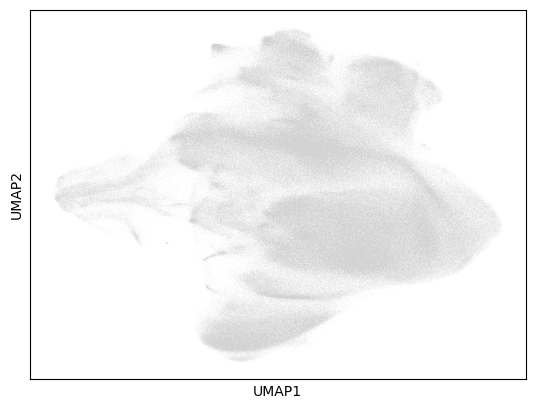

In [ ]:
sc.pl.umap(adata)
#/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW
# create merged one, the carcinoma one?
# read in individual one and merge them